In [1]:
from bs4 import BeautifulSoup
import urllib.request as REQ

import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import matplotlib

# 한글 깨짐 방지
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
murl='https://movie.daum.net/premovie/released'
response = REQ.urlopen(murl)
soup = BeautifulSoup(response, 'html5lib')
soup

>
												
																									<dt>현재 예매율</dt>
													<dd>예매율 32.9%</dd>
																							</dl>
																							<a class="link_book" data-tiara-layer="btn_reservation" data-tiara-ordnum="1" href="https://movie.yes24.com/Movie/Ticket?gId=M000076350">예매하기<span class="ico_popcorn"></span></a>
																					</div>
									</li>
																	<li>
										<a class="link_boxthumb" data-tiara-id="131305" data-tiara-layer="poster" data-tiara-ordnum="2" data-tiara-type="movie" href="/moviedb/main?movieId=131305">
											                                                                                        <img alt="뱅가드" class="lazy thumb_photo" src="//img1.daumcdn.net/thumb/C338x491/?fname=https://t1.daumcdn.net/movie/f82c7664c12a5f44f780a7a49ebfcda8c0f2ce5c" style="display: block;"/><!-- POPCORN-1060 수정-->
										</a>
																				<div class="desc_boxthumb">
											<strong class="tit_join"><a class="link_g" data-tiara-id="131305" data

In [3]:
s='#mArticle'
ulTag = soup.select(s)
ulTag

[<div id="mArticle">
 		<h2 class="screen_out" id="dkbody">상영 예정 영화 본문</h2>
 			<div class="detail_movie detail_premovie">
 				<div class="movie_detail">
 					<h3 class="screen_out">현재 상영작</h3><!-- 텝에 맞게 텍스트 변경 -->
 					<div class="main_detail">
 						<div class="check_reservation">
 							<input class="inp_check" id="checkReservation" type="checkbox"/>
 							<label class="lab_check" for="checkReservation"><span class="ico_popcorn"></span><!--ico_check 추가시 활성화 -->예매가능한 영화만 보기</label>
 						</div>
 						<div class="movie_join" data-tiara-layer="movie_list">
 							<ul class="list_boxthumb">
 																	<li>
 										<a class="link_boxthumb" data-tiara-id="115600" data-tiara-layer="poster" data-tiara-ordnum="1" data-tiara-type="movie" href="/moviedb/main?movieId=115600">
 											                                                                                        <img alt="원더 우먼 1984" class="lazy thumb_photo" src="//img1.daumcdn.net/thumb/C338x491/?fname=https://t

In [4]:
movieList=[]
for l in ulTag:
    # print(l.select('li'))
    for j in l.select('li'):
        movieList.append({'영화명' : j.select_one('.link_g').string,
                          '평점' : j.select_one('.emph_grade').string,
                          '개봉일' : j.select_one('dd').string})
        # print('영화명', j.select_one('.link_g').string)
        # print('평점', j.select_one('.emph_grade').string)
        # print('개봉일', j.select_one('dd').string)
# movieList
        

### 2. 위의 결과를 데이터프레임으로 변환후 평점이 8.0 이상인 영화명 평점 개봉일을 출력하시요

In [5]:
movieDF = pd.DataFrame(movieList)
movieDF

,영화명,평점,개봉일
0,원더 우먼 1984,5.4,2020.12.23 개봉
1,뱅가드,5.6,2020.12.30 개봉
2,화양연화,8.5,2020.12.24 재개봉
3,나이팅게일,6.5,2020.12.30 개봉
4,조제,7.0,2020.12.10 개봉
5,극장판 바이올렛 에버가든,8.5,2020.11.12 개봉
6,럭키 몬스터,7.4,2020.12.03 개봉
7,썸머 85,7.9,2020.12.24 개봉
8,도굴,7.2,2020.11.04 개봉
9,운디네,9.5,2020.12.24 개봉


In [6]:
# 문자열을 float형으로 변환
movieDF = movieDF.astype({'평점':float})
movieDF['평점']

0      5.4
1      5.6
2      8.5
3      6.5
4      7.0
5      8.5
6      7.4
7      7.9
8      7.2
9      9.5
10     5.6
11    10.0
12     0.0
13     7.9
14     9.2
15     7.0
16     9.0
17     8.7
18     8.7
19     9.5
Name: 평점, dtype: float64

In [7]:
movieDF[movieDF['평점'] >= 8.0]

,영화명,평점,개봉일
2,화양연화,8.5,2020.12.24 재개봉
5,극장판 바이올렛 에버가든,8.5,2020.11.12 개봉
9,운디네,9.5,2020.12.24 개봉
11,100% 울프: 푸들이 될 순 없어,10.0,2020.12.24 개봉
14,러브레터,9.2,2020.12.23 재개봉
16,"내 어깨 위 고양이, 밥 2",9.0,2020.12.24 개봉
17,러브 액츄얼리,8.7,2020.12.16 재개봉
18,함께 있을 수 있다면,8.7,2020.12.24 개봉
19,언플랜드,9.5,2020.12.17 개봉


### 3. x축을 영화명 으로 y축을 평점으로 라인차트를 그리시요

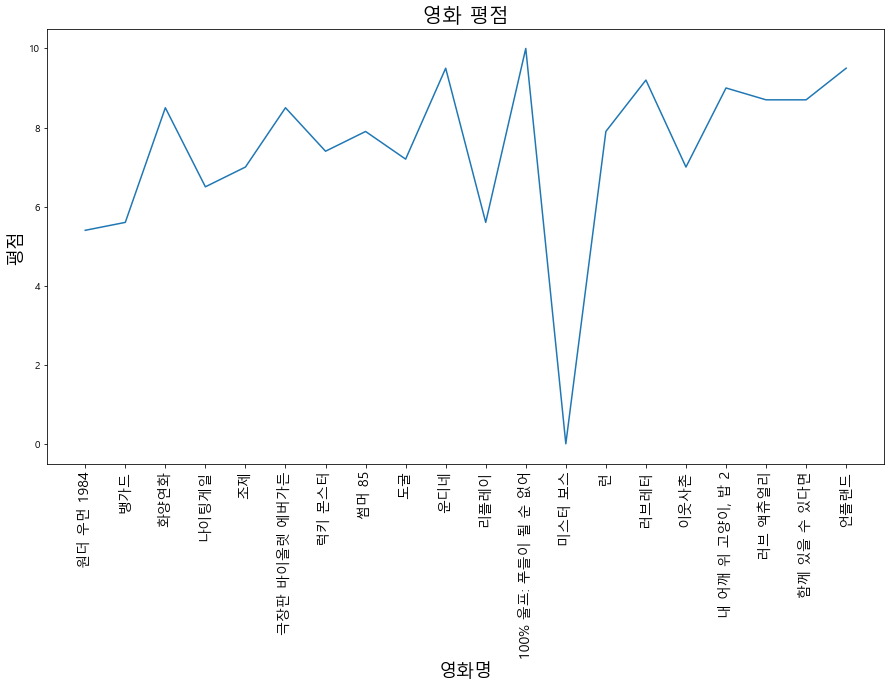

In [8]:
m_chart = movieDF.set_index('영화명')[['평점']]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(m_chart)
ax.set_title('영화 평점', size=20)
ax.set_xlabel('영화명', size=18)
ax.set_ylabel('평점', size=18)
ax.set_xticklabels(list(m_chart.index), rotation=90, fontsize=14)
plt.show()

### 4. 2020년11월 10일 이후 개봉한 영화명,평점,개봉일을 구하시요

In [9]:
# 재개봉 글자 제거!
movieDF['개봉일'] = movieDF['개봉일'].map(lambda x: x.rstrip('재개봉'))

In [10]:
movieDF['개봉일'] = pd.to_datetime(movieDF['개봉일'])
movieDF['개봉일']

0    2020-12-23
1    2020-12-30
2    2020-12-24
3    2020-12-30
4    2020-12-10
5    2020-11-12
6    2020-12-03
7    2020-12-24
8    2020-11-04
9    2020-12-24
10   2020-12-16
11   2020-12-24
12   2020-12-30
13   2020-11-20
14   2020-12-23
15   2020-11-25
16   2020-12-24
17   2020-12-16
18   2020-12-24
19   2020-12-17
Name: 개봉일, dtype: datetime64[ns]

In [11]:
# 인덱스 지정
movieDF.set_index('개봉일', inplace=True)

In [12]:
movieDF[movieDF.index >= '2020-12-10' ].sort_index()

,영화명,평점
개봉일,,
2020-12-10,조제,7.0
2020-12-16,리플레이,5.6
2020-12-16,러브 액츄얼리,8.7
2020-12-17,언플랜드,9.5
2020-12-23,원더 우먼 1984,5.4
2020-12-23,러브레터,9.2
2020-12-24,화양연화,8.5
2020-12-24,썸머 85,7.9
2020-12-24,운디네,9.5
